Regression Week 4: Ridge Regression Assignment 2

In this assignment, you will implement ridge regression via gradient descent. You will:

- Convert an SFrame into a Numpy array (if applicable)
- Write a Numpy function to compute the derivative of the regression weights with respect to a single feature
- Write gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
dtype_dict = {
    'bathrooms':float, 
    'waterfront':int, 
    'sqft_above':int, 
    'sqft_living15':float, 
    'grade':int, 
    'yr_renovated':int, 
    'price':float, 
    'bedrooms':float, 
    'zipcode':str, 
    'long':float,
    'sqft_lot15':float,
    'sqft_living':float,
    'floors':str,
    'condition':int,
    'lat':float,
    'date':str,
    'sqft_basement':int,
    'yr_built':int,
    'id':str,
    'sqft_lot':int,
    'view':int
}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

From Module 2, copy and paste the ‘get_numpy_data’ function (or equivalent) that takes a dataframe, a list of features (e.g. [‘sqft_living’, ‘bedrooms’]), to be used as inputs, and a name of the output (e.g. ‘price’). This function returns a ‘feature_matrix’ (2D array) consisting of first a column of ones followed by columns containing the values of the input features in the data set in the same order as the input list. It alsos return an ‘output_array’ which is an array of the values of the output in the data set (e.g. ‘price’).



In [3]:
def get_numpy_data(data_frame, features, output):

    features_matrix = np.array([np.ones(len(data_frame))] + [data_frame[feature] for feature in features])

    output_array = np.array(data_frame[output])
    
    return features_matrix.T, output_array

Similarly, copy and paste the ‘predict_output’ function (or equivalent) from Module 2. This function accepts a 2D array ‘feature_matrix’ and a 1D array ‘weights’ and return a 1D array ‘predictions’.



In [4]:
def predict_outcome(feature_matrix, weights):
    return feature_matrix.dot(weights)

We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.

In [5]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if (feature_is_constant): return 2 * np.sum(errors)
    
    dRSSdw = 2 * np.sum(errors * feature)
    dL2dw = 2 * l2_penalty * weight
    
    return dRSSdw + dL2dw

In [6]:
example_features, example_output= get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])

test_predictions = predict_outcome(example_features, my_weights)
errors = test_predictions - example_output

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors*example_features[:,1])*2+20.)
print('')

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2.)

-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0


Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.

The amount by which we move in the negative gradient direction is called the ‘step size’. We stop when we are ‘sufficiently close’ to the optimum. Unlike in Module 2, this time we will set a maximum number of iterations and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

With this in mind, write a gradient descent function using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria. The function will take the following parameters:

- 2D feature matrix
- array of output values
- initial weights
- step size
- L2 penalty
- maximum number of iterations

In [7]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights)
    
    iteration = 0
    
    while iteration < max_iterations:
        iteration += 1
       
        test_predictions = predict_outcome(feature_matrix, weights)
        errors = test_predictions - output
        
        for i in range(len(weights)):
            weights[i] -= step_size * feature_derivative_ridge(
                errors, 
                feature_matrix[:,i], 
                weights[i], 
                l2_penalty,
                i == 0
            )
            
    return weights

Convert the training set and test set using the ‘get_numpy_data’ function.e.g. in Python:


In [8]:
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)

In [9]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)


First, let’s consider no regularization. Set the L2 penalty to 0.0 and run your ridge regression algorithm to learn the weights of the simple model (described above). Use the following parameters:

- step_size = 1e-12
- max_iterations = 1000
- initial_weights = all zeros

Store the learned weights as simple_weights_0_penalty


In [10]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, np.zeros(len(simple_feature_matrix[0])), 1e-12, 0., 1000)
simple_weights_0_penalty

array([ -1.63113515e-01,   2.63024369e+02])

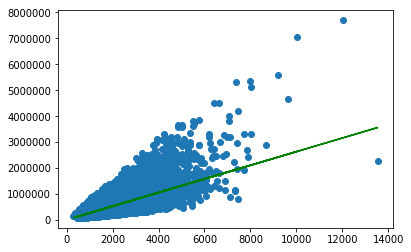

In [11]:
fig, ax = plt.subplots()

ax.scatter(x=train_data['sqft_living'], y=train_data['price'])
ax.plot(train_data['sqft_living'], predict_outcome(simple_feature_matrix, simple_weights_0_penalty), color='green')
plt.show()

Next, let’s consider high regularization. Set the L2 penalty to 1e11 and run your ridge regression to learn the weights of the simple model. Use the same parameters as above. Call your weights simple_weights_high_penalty



In [12]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, np.zeros(len(simple_feature_matrix[0])), 1e-12, 1e11, 1000)
simple_weights_high_penalty

array([   9.76730382,  124.57217567])

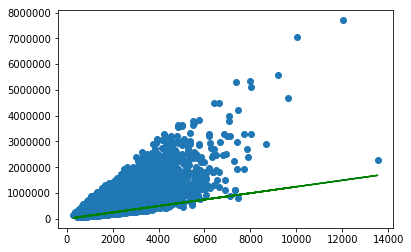

In [13]:
fig, ax = plt.subplots()

ax.scatter(x=train_data['sqft_living'], y=train_data['price'])
ax.plot(train_data['sqft_living'], predict_outcome(simple_feature_matrix, simple_weights_high_penalty), color='green')
plt.show()

In [14]:
simple_weights_0_penalty[1], simple_weights_high_penalty[1]

(263.02436896538489, 124.57217567413909)

Compute the RSS on the TEST data for the following three sets of weights:

- The initial weights (all zeros)
- The weights learned with no regularization
- The weights learned with high regularization

In [15]:
rss = lambda y, y_hat: np.dot((y - y_hat).T, (y - y_hat))

In [16]:
simple_test_feature_matrix, test_output = get_numpy_data(test_data, simple_features, my_output)

print(rss(test_output, predict_outcome(simple_test_feature_matrix, np.zeros(len(simple_test_feature_matrix[0])))))
print(rss(test_output, predict_outcome(simple_test_feature_matrix, simple_weights_0_penalty)))
print(rss(test_output, predict_outcome(simple_test_feature_matrix, simple_weights_high_penalty)))

1.78427328614e+15
2.75723632154e+14
6.9464210149e+14


Let us now consider a model with 2 features: [ ‘sqft_living’, ‘sqft_living_15’]. First, create Numpy version of your training and test data with the two features.

First, let’s consider no regularization. Set the L2 penalty to 0.0 and run your ridge regression algorithm. Use the following parameters:

- initial_weights = all zeros
- step size = 1e-12
- max_iterations = 1000

Call the learned weights multiple_weights_0_penalty

In [17]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'

feature_matrix, output = get_numpy_data(train_data, model_features, my_output)
test_feature_matrix, test_output = get_numpy_data(test_data, model_features, my_output)

multiple_weights_0_penalty = ridge_regression_gradient_descent(
    feature_matrix, 
    output, 
    np.zeros(len(feature_matrix[0])), 
    1e-12, 
    0.0,
    1000
)

multiple_weights_high_penalty = ridge_regression_gradient_descent(
    feature_matrix, 
    output, 
    np.zeros(len(feature_matrix[0])), 
    1e-12, 
    1e11,
    1000
)
print(multiple_weights_0_penalty)
print(multiple_weights_high_penalty)
multiple_weights_0_penalty[1], multiple_weights_high_penalty[1]

[  -0.35743483  243.05416982   22.41481497]
[  6.74296579  91.48927365  78.43658766]


(243.05416982095636, 91.489273647123937)

In [18]:
print(rss(test_output, predict_outcome(test_feature_matrix, np.zeros(len(test_feature_matrix[0])))))
print(rss(test_output, predict_outcome(test_feature_matrix, multiple_weights_0_penalty)))
print(rss(test_output, predict_outcome(test_feature_matrix, multiple_weights_high_penalty)))

1.78427328614e+15
2.74067615919e+14
5.00404800501e+14


In [20]:
output[0] - predict_outcome(test_feature_matrix, multiple_weights_0_penalty)[0] > output[0] - predict_outcome(test_feature_matrix, multiple_weights_high_penalty)[0]

False